# Instalando y ligando Apache-Spark (pyspark) a Pycharm y Jupyter

Primero vamos a descargar spark:

Spark puede ser ejecutado en un cluster en **modo local**, esto significa que todos los procesos de spark corren en la misma JVM. Una de las ventajas de usar este **modo local** es que se puede debuggear el trabajo y probarlo, este modo tambien puede ser util en escenarios donde queremos ejecutar computo en paralelo a traves de diferentes procesadores en una sola computadora:

### Para Pycharm:

### Paso 1

En mac, abrimos la terminal e instalamos con homebrew:

1. `brew install apache-spark`
2. `brew install hadoop`

### Paso 2
Luego obtenemos el path para configurar en pycharm, en la terminal:

1. brew info apache-spark

```user@MacBook-Pro-de-User-2:~ brew info apache-spark
apache-spark: stable 1.6.0, HEAD Engine for large-scale data processing
https://spark.apache.org/
/usr/local/Cellar/apache-spark/1.5.1 (649 files, 302.9M) *
  Poured from bottle
From: https://github.com/Homebrew/homebrew/blob/master/Library/Formula/apache-spark.rb
```

### Paso 3
1. Luego vamos a Pycharm de lado superior: Run>Edit Configurations >Environment Variables. 
2. Creamos dos nuevas variables PYTHONPATH Y SPARKHOME
3. En PYTHONPATH ( /usr/local/Cellar/apache-spark/1.5.1/libexec/python )
4. EN SPARKHOME ( /usr/local/Cellar/apache-spark/1.5.1 )

Finalmente parece que todo esta listo.

Por otro lado, tambien hubieramos podido usar el siguiente script:

```
import os
import sys

 # Path for spark source folder
 #/usr/local/Cellar/apache-spark/1.5.1
os.environ['SPARK_HOME']="/usr/local/Cellar/apache-spark/1.5.1"

 # Append pyspark  to Python Path
sys.path.append("/usr/local/Cellar/apache-spark/1.5.1/libexec/python")

try:
    from pyspark import SparkContext
    from pyspark import SparkConf
    print ("Successfully imported Spark Modules")

except ImportError as e:
    print ("Can not import Spark Modules", e)
    sys.exit(1)
```

### Para Jupyter:

Ahora para ligar pyspark con jupyter hacemos lo siguiente en la terminal (asegurarse de revisar las versiones de apache-spark):

### Paso 1

```
user@MacBook-Pro-de-User-2:~$ echo "export PATH=$PATH:/usr/local/Cellar/apache-spark/1.5.1/bin" >> .profile
user@MacBook-Pro-de-User-2:~$ echo "export PYSPARK_DRIVER_PYTHON=ipython" >> .profile
user@MacBook-Pro-de-User-2:~$ echo "export PYSPARK_DRIVER_PYTHON_OPTS='notebook' pyspark" >> .profile
user@MacBook-Pro-de-User-2:~$ source .profile
```


### Paso 2
Ahora abrimos en la terminal un notebook y iniciado pyspark:

```
user@MacBook-Pro-de-User-2:~$ cd Jupyter/
user@MacBook-Pro-de-User-2:~/Jupyter$ pyspark
```

Ahora podemos probar con la variable spark context

In [21]:
sc

Ambos quedaron ligados e instalados 

# Explorando y visualizando datos con apache-spark

Para este ejemplo usaremos The MovieLens 100k dataset

In [22]:
user_data = sc.textFile('/Users/user/Downloads/ml-100k/u.user')
user_data.first()

u'1|24|M|technician|85711'

In [23]:
#Aunque tambien lo hubieramos podido hacer con pandas
import pandas as pd
df = pd.read_csv('/Users/user/Downloads/ml-100k/u.user', sep='|')
df.head()


,1,24,M,technician,85711
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101


In [24]:
user_fields = user_data.map(lambda line :
                           line.split('|'))
user_fields

PythonRDD[51] at RDD at PythonRDD.scala:43

In [25]:
num_users = user_fields.map(lambda fields:
                           fields[0]).distinct().count()

num_genders = user_fields.map(lambda fields:
                             fields[2]).distinct().count()

num_ocupations = user_fields.map(lambda fields:
                                fields[3]).distinct().count()

num_zipcodes = user_fields.map(lambda fields:
                              fields[4]).distinct().count()

print 'Users: %d, genders:%d, occupations:%d, Codigos postales:%d'%(
    num_users, num_genders, num_ocupations, num_zipcodes)


Users: 943, genders:2, occupations:21, Codigos postales:795


Populating the interactive namespace from numpy and matplotlib


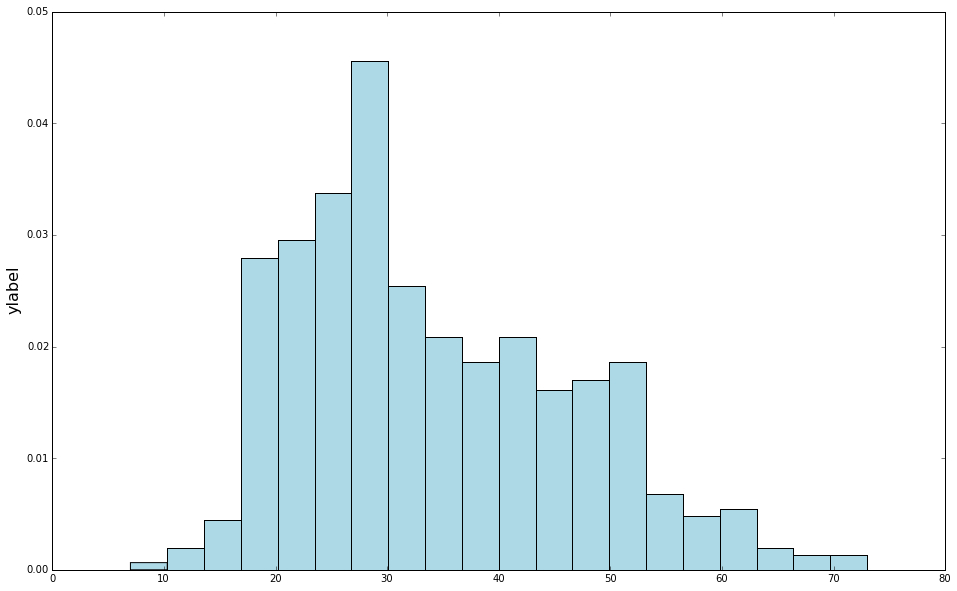

In [34]:
get_ipython().magic(u'pylab inline')
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

ages = user_fields.map(lambda x: int(x[1])).collect()
hist(ages, bins=20, color='lightblue', normed=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)
plt.ylabel('ylabel', fontsize=16)